### initial check

In [1]:
import os
import numpy as np
import pandas as pd
import funpack
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp_dir = os.path.dirname(funpack.__file__)
print(fp_dir)

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/funpack


In [3]:
cfg_dir = os.path.join(fp_dir, 'configs', 'fmrib')

for f in os.listdir(cfg_dir):
    print(f)

datetime_formatting.tsv
variables_clean.tsv
processing.tsv
categories.tsv
variables_parentvalues.tsv
datacodings_navalues.tsv
datacodings_recoding.tsv


In [4]:
df = pd.read_csv(os.path.join(cfg_dir, 'categories.tsv'), '\t')

In [5]:
df.shape

(24, 3)

In [6]:
df

,ID,Category,Variables
0,1,"age, sex, brain MRI protocol, Phase","31,34,21022,22200,25780"
1,2,genetics,"21000,22000:22125,22201:22325,22182,22800:22823"
2,3,early life factors,"52,129,130,1677,1687,1697,1737,1767,1777,1787,..."
3,10,lifestyle and environment - general,"3:6,132,189,670,680,699,709,728,738,767,777,10..."
4,11,lifestyle and environment - exercise and work,"1001,1011,796,806,816,826,845,864,874,884,894,..."
5,12,lifestyle and environment - food and drink,"1289:10:1389,1408:10:1548,2654,3089,3680,6144,..."
6,13,lifestyle and environment - alcohol,"1558:10:1628,2664,3731,3859,4407,4418,4429,444..."
7,14,lifestyle and environment - tobacco,"1239:10:1279,2644,2867:10:2907,2926,2936,3159,..."
8,20,physical measures - general,"46:51,1707,1717,1727,1747,1757,2306,3059,3062:..."
9,21,physical measures - bone density and sizes,"77,78,3083:3086,3143:3144,3146:3148,4092,4095,..."


In [24]:
df[df['ID']==31]['Variables'].values[0]

'25000:25746,25754:25759,25761:25768,25781:25920,26500:26514,26517:26518,26520:27772'

In [26]:
np.array([25000:25746,25754:25759,25761:25768,25781:25920,26500:26514,26517:26518,26520:27772])

SyntaxError: invalid syntax (<ipython-input-26-839acb3a7124>, line 1)

In [7]:
dfp = pd.read_csv(os.path.join(cfg_dir, 'datacodings_navalues.tsv'), sep='\t')

In [8]:
dfp

,ID,NAValues
0,13,"-1,-3"
1,14,"-1,-3"
2,37,"-1,-3"
3,90,-3
4,101,-1
...,...,...
179,100690,-3
180,100691,-3
181,100692,-3
182,100698,-313


#### testing subj data

* 0 - initial assessment visit (2006-10), recruited and consent, 8840 people
* 1 - first repeat assessment visit (2012-13), 218 people
* 2 - imaging visit (2014+), 462 people
* 3 - first repeat imaging visit (2019+) 

In [32]:
# original data from paul's original slice
tsv_cond = os.path.join('..', 'funpack_cfg', 'subj_with_condition_with_clinical_variables.tsv')

In [16]:
# extended to more pain
tsv_cond = os.path.join('..', 'funpack_cfg', 'subjs_with_condition_extended.tsv')

In [2]:
# extended to more pain
tsv_cond = os.path.join('..', 'funpack_cfg', 'questions_subjs_disease_allvisits_extended.tsv')

In [3]:
df_cond = pd.read_csv(tsv_cond, sep='\t')

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (654,655,656,657,658,659,660,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,740,741,742,743,744,747,750,782,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,952,953,954,955,956,957,958,959,960,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1050,1051,1052,1053,1054,1055,1056,1057,1058,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160

In [4]:
df_cond.shape

(9116, 2413)

In [5]:
df_cond.head()

,eid,25010-2.0,25010-3.0,20002-0.0,20002-0.1,20002-0.2,20002-0.3,20002-0.4,20002-0.5,20002-0.6,...,20155-0.21,20155-0.22,20155-0.23,20155-0.24,20155-0.25,20156-0.0,20157-0.0,20246-0.0,20247-0.0,20248-0.0
0,1001416,1142620.0,NaN,1154.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002910,1186410.0,NaN,1065.0,1154.0,99999.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003609,1050590.0,NaN,1154.0,1309.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003799,1153910.0,NaN,1111.0,1396.0,1154.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010078,1348740.0,NaN,1516.0,1387.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### check questionnaire data

In [ ]:
df_cond['20414-0.0'].value_counts()

In [10]:
sum(df_cond['3799-0.0value_counts

1608

In [12]:
sum(df_cond['4067-2.0']==1)

107

In [13]:
sum(df_cond['3404-2.0']==1)

1450

In [14]:
sum(df_cond['3571-2.0']==1)

1550

In [15]:
sum(df_cond['3741-2.0']==1)

471

In [16]:
sum(df_cond['3414-2.0']==1)

1165

In [17]:
sum(df_cond['3773-2.0']==1)

2106

#### check missing pain in each visit

In [6]:
np.sum(np.isnan(df_cond['6159-0.0']))

8

In [7]:
np.unique(df_cond['6159-0.0'])

array([-7., -3.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan, nan, nan,
       nan, nan, nan, nan, nan])

In [7]:
np.sum(np.isnan(df_cond['6159-1.0']))

6362

In [8]:
np.sum(np.isnan(df_cond['6159-2.0']))

59

In [9]:
np.sum(np.isnan(df_cond['6159-3.0']))

7625

In [10]:
p_cols = [col for col in df_cond.columns if '41208' in col]

In [11]:
p_cols

[]

#### check pain types

In [6]:
cols = df_cond.columns

In [6]:
all_vars = []
for c in cols:
    all_vars.append(c.split('-')[0])

In [7]:
unique_vars = np.unique(all_vars)

In [8]:
len(unique_vars)

1022

In [85]:
pain_types = {
    'back pain': 3571, 
    'facial pain': 4067,
    'general pain': 2956,
    'headache': 3799,
    'hip pain': 3414,
    'knee pain': 3773,
    'neck/shoulder pain': 3404,
    'stomach pain': 3741
}

In [10]:
pain_types.values()

dict_values([3571, 4067, 2956, 3799, 3414, 3773, 3404, 3741])

In [86]:
def extract_pain(df, pain_code, visit=None):
    """extract pain type into df"""
    # slice columns
    if type(pain_code) is list:
        p_cols = []
        for code in pain_code:
            p_cols += [col for col in df.columns if str(code) in col]
    else:
        p_cols = [col for col in df.columns if str(pain_code) in col]
    # slice particular visit
    if visit is not None:
        p_cols = [col for col in p_cols if '-'+str(visit) in col]
    # extract pain df
    df_pain = pd.concat([df_cond['eid'], df[p_cols]], axis=1)
    df_pain.set_index('eid', inplace=True)
    # replace nans
    df_pain.replace([-1.,-3.], np.nan, inplace=True)
    return df_pain

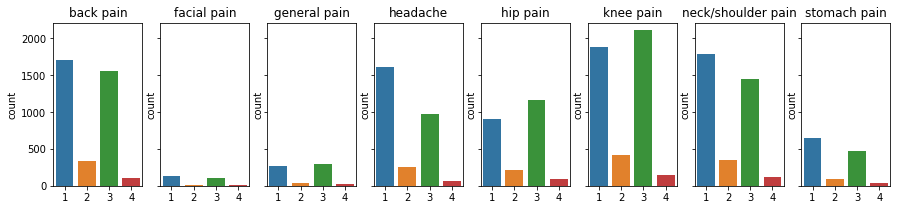

In [130]:
# check data count
f, axes = plt.subplots(1,len(pain_types), figsize=(15, 3), sharey=True)
c = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes[c])
    axes[c].set_title(k)
    axes[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [132]:
# check data count
tt = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    df_tmp.dropna(inplace=True)
    print(k, df_tmp.shape[0])
    tt += df_tmp.shape[0]
print(tt)

back pain 4
facial pain 0
general pain 1
headache 8
hip pain 0
knee pain 3
neck/shoulder pain 5
stomach pain 0
21


In [136]:
# check data count
tt = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    df_tmp.dropna(inplace=True, subset=[df_tmp.columns[0]])
    print(k, df_tmp.shape[0])
    tt += df_tmp.shape[0]
print(tt)

back pain 1708
facial pain 139
general pain 268
headache 1608
hip pain 908
knee pain 1878
neck/shoulder pain 1786
stomach pain 643
8938


In [156]:
# check people with multiple pain
df_tmp = extract_pain(df_cond, list(pain_types.values()), visit=1)
df_tmp.shape

(8331, 8)

In [161]:
# multiple pain subjects
mp_sj = []
for i, row in df_tmp.iterrows():
    if np.nansum(row.values)>2:
        mp_sj.append(i)

In [162]:
len(mp_sj)

190

In [187]:
# check people more than 1 observations
slice1 = 0
slice2 = 2
cc = 0
for k, v in pain_types.items():
    df1 = extract_pain(df_cond, v, visit=slice1)
    df3 = extract_pain(df_cond, v, visit=slice2)
    df1.replace(0.0, np.nan, inplace=True) # keep pain only
    df3.replace(0.0, np.nan, inplace=True) # keep pain only

    same_idx = df1.values==df3.values
    print(k, df1[same_idx].shape[0])
    cc += df1[same_idx].shape[0]
print(cc)

back pain 753
facial pain 31
general pain 79
headache 644
hip pain 354
knee pain 926
neck/shoulder pain 654
stomach pain 163
3604


In [164]:
# check people with multiple pain
df2 = extract_pain(df_cond, list(pain_types.values()), visit=2)
df2.shape

(8331, 8)

#### check disease 

In [12]:
def extract_disease(df, disease_code, visit=None):
    """extract disease type into df"""
    # slice reported disease
    df_d = df[[col for col in df.columns if str(20002) in col]]
    df_d = pd.concat([df['eid'], df_d], axis=1)
    # slice particular visit
    df_dvd = pd.DataFrame()
    df_dvd['eid'] = df_d['eid']
    if visit is not None:
        for visit in range(4):
            p_cols = [col for col in df_d.columns if '-'+str(visit) in col]
            # extract visit df
            df_dv = pd.concat([df_d['eid'], df_d[p_cols]], axis=1)
            df_dv.set_index('eid', inplace=True)
            # find matching disease
            disease_tag = []
            for i, r in df_dv.iterrows():
                if float(disease_code) in r.values:
                    disease_tag.append(1)
                else:
                    disease_tag.append(0)
            df_dvd[str(disease_code)+'-'+str(visit)] = disease_tag
        df_dvd.set_index('eid', inplace=True)

    return df_dvd

In [13]:
dfd = extract_disease(df_cond, 1154, visit=0)

In [14]:
dfd.shape

(8331, 4)

In [15]:
dfd.columns

Index(['1154-0', '1154-1', '1154-2', '1154-3'], dtype='object')

In [37]:
df_disease = pd.read_csv('./bbk_codes/disease_code.csv' )

In [38]:
df_disease

,disease,code
0,irritable bowel syndrome,1154
1,migraine,1265
2,headaches (not migraine),1436
3,back problem,1294
4,cervical spondylosis,1478
5,spine arthritis/spondylitis,1311
6,prolapsed disc/slipped disc,1312
7,disc problem,1532
8,disc degeneration,1533
9,back pain,1534


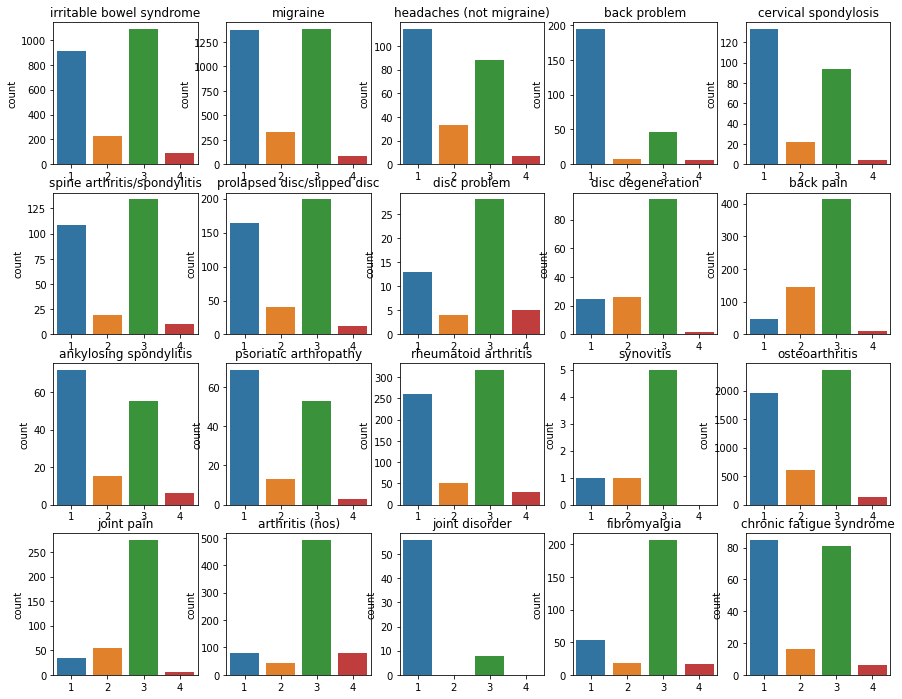

In [18]:
# check data count
f, axes = plt.subplots(4,int(df_disease.shape[0]/4), figsize=(15, 12))#, sharey=True)
c = 0

for i, r in df_disease.iterrows():
    df_tmp = extract_disease(df_cond, r['code'], visit=[0,1,2,3])
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels(['1','2','3','4'])
    c += 1

#### grouping diseases and check numbers

now reducing number of conditions to:
* IBS
* Migraine (exclude headache)
* Osteoarthritis
* Fibromyalgia
* Bakc pain (back problem, cervical spondylosis, spine arthritis, prolapsed disc, disc problem, disc degeneration, back pain)

In [39]:
df_disease_mod = df_disease

In [41]:
# remove headache,ankylosing spondylitis,psoriatic arthropathy,rheumatoid arthritis,synovitis,joint pain,
# arthritis (nos),joint disorder,chronic fatigue syndrome
df_disease_mod.drop([2,10,11,12,13,15,16,17,19], axis=0, inplace=True) 

In [42]:
df_disease_mod

,disease,code
0,irritable bowel syndrome,1154
1,migraine,1265
3,back problem,1294
4,cervical spondylosis,1478
5,spine arthritis/spondylitis,1311
6,prolapsed disc/slipped disc,1312
7,disc problem,1532
8,disc degeneration,1533
9,back pain,1534
14,osteoarthritis,1465


In [44]:
df_dgroup = pd.DataFrame({
    'disease': ['irritable bowel syndrome','migraine','back pain', 'osteoarthritis', 'fibromyalgia'],
    'code':[1154, 1265, [1294,1478,1311,1312,1532,1533,1534], 1465, 1542]
})

In [50]:
df_dgroup

,disease,code
0,irritable bowel syndrome,1154
1,migraine,1265
2,back pain,"[1294, 1478, 1311, 1312, 1532, 1533, 1534]"
3,osteoarthritis,1465
4,fibromyalgia,1542


In [51]:
df_dgroup.to_csv('./bbk_codes/disease_code_grouped.csv', index=None)

In [89]:
def extract_disease(df, disease_code, visit=None):
    """extract disease type into df"""
    # slice reported disease
    df_d = df[[col for col in df.columns if str(20002) in col]]
    df_d = pd.concat([df['eid'], df_d], axis=1)
    # slice particular visit
    df_dvd = pd.DataFrame()
    df_dvd['eid'] = df_d['eid']
    if visit is not None:
        for vis in visit:
            p_cols = [col for col in df_d.columns if '-'+str(vis) in col]
            # extract visit df
            df_dv = pd.concat([df_d['eid'], df_d[p_cols]], axis=1)
            df_dv.set_index('eid', inplace=True)
            # find matching disease
            disease_tag = []
            if type(disease_code) is list:
                dcode_float = [float(i) for i in disease_code]
            else:
                dcode_float = [float(disease_code)]
            for i, r in df_dv.iterrows():
                if any(item in dcode_float for item in r.values):
                    disease_tag.append(1)
                else:
                    disease_tag.append(0)
            df_dvd[str(dcode_float[0])+'-'+str(vis)] = disease_tag
        df_dvd.set_index('eid', inplace=True)

    return df_dvd

In [107]:
# df_tmp = extract_disease(df_cond, [1294, 1478, 1311, 1312, 1532, 1533, 1534], visit=[0,2])
df_tmp = extract_disease(df_cond, 1154, visit=[0,2])
# df_tmp = extract_disease(df_cond, 1294, visit=[0,1,2,3])

In [108]:
df_tmp.shape

(8331, 2)

In [109]:
df_tmp.value_counts()

1154.0-0  1154.0-2
0         0           6662
          1            755
1         0            582
          1            332
dtype: int64

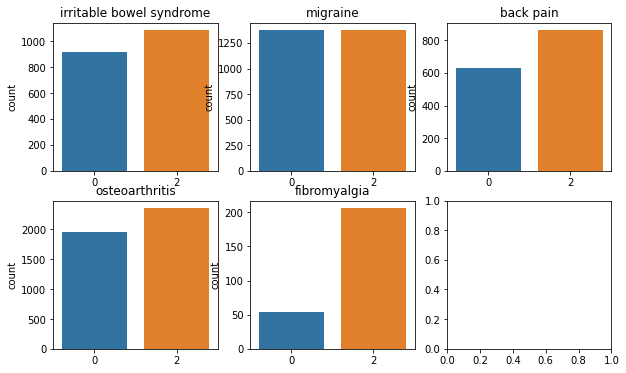

In [79]:
# check data count
f, axes = plt.subplots(2,int(np.ceil(df_dgroup.shape[0]/2)), figsize=(10, 6))#, sharey=True)
c = 0
visits = [0,2]
for i, r in df_dgroup.iterrows():
    df_tmp = extract_disease(df_cond, r['code'], visit=visits)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels([str(i) for i in visits])
    c += 1

#### check digestive health date vs imaging date

In [106]:
# check image condition
df_d = df_cond[['53-2.0','21023-0.0']]
df_d = pd.concat([df_cond['eid'], df_d], axis=1)
df_d.set_index('eid', inplace=True)
# remove na
df_d.dropna(inplace=True)
# rename cols
df_d.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [108]:
# to dt
df_dt = pd.to_datetime(df_d['digest_date'])
df_it = pd.to_datetime(df_d['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [109]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.3967889908256881

In [110]:
len(dff)

6540

In [111]:
sum(dff>0)

2595

In [112]:
df_qualify = df_d.iloc[dff>0]

#### check how many qualified have pain

In [89]:
df_conds = df_cond.set_index('eid')

In [91]:
df_conds.shape

(8331, 3793)

In [92]:
dfq = df_conds[df_conds.index.isin(df_qualify.index)]

In [101]:
dfq['eid'] = dfq.index.values

<ipython-input-101-947c8bc6c436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['eid'] = dfq.index.values


In [102]:
dfq.shape

(2595, 3794)

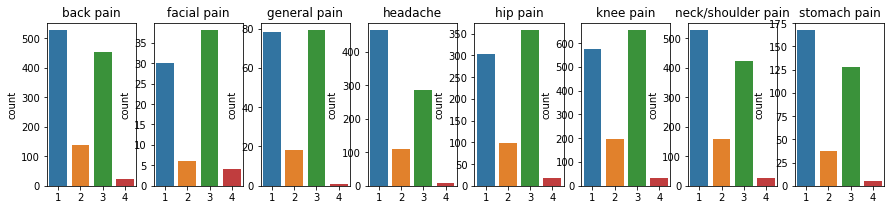

In [103]:
# check data count
f, axes = plt.subplots(1,len(pain_types), figsize=(15, 3))
c = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(dfq, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes[c])
    axes[c].set_title(k)
    axes[c].set_xticklabels(['1','2','3','4'])
    c += 1

(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)


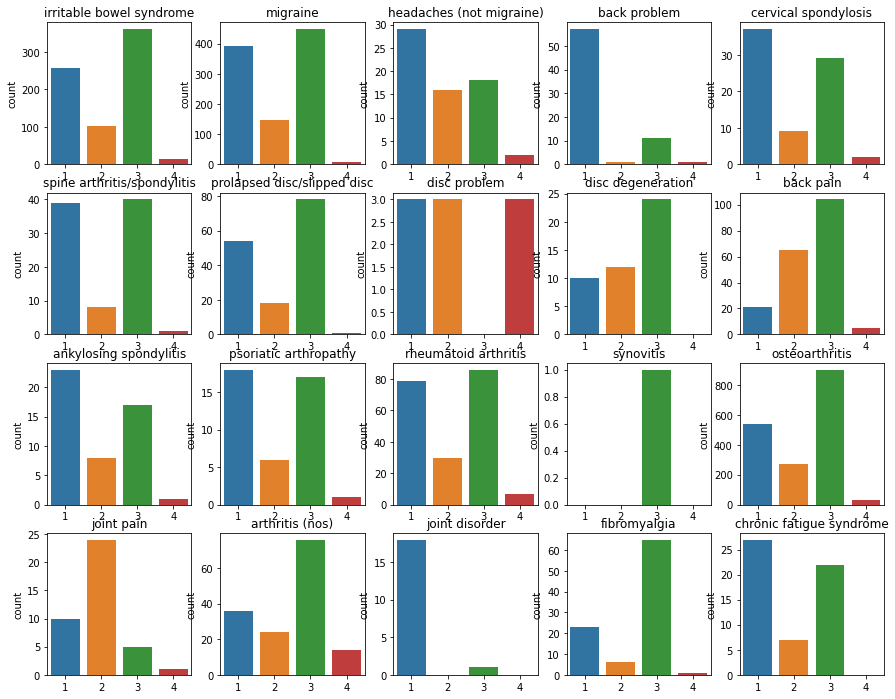

In [105]:
# check data count
f, axes = plt.subplots(4,int(df_disease.shape[0]/4), figsize=(15, 12))#, sharey=True)
c = 0

for i, r in df_disease.iterrows():
    df_tmp = extract_disease(dfq, r['code'], visit=[0,1,2,3])
    print(df_tmp.shape)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [ ]:
dfq

#### check without conditions

In [114]:
tsv_nocond = os.path.join('..', 'funpack_cfg', 'subj_withOUT_condition_with_clinical_variables.tsv')

df_nocond = pd.read_csv(tsv_nocond, sep='\t')

df_nocond.shape

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2499,2500,2501,2502,2503,2504,2505,2506,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,3001,3002,3003,3004,3005,3006,30

(14659, 3794)

In [121]:
# check image condition
df_d = df_nocond[['53-2.0','21023-0.0']]
df_d = pd.concat([df_nocond['eid'], df_d], axis=1)
df_d.set_index('eid', inplace=True)
# remove na
df_d.dropna(inplace=True)
# rename cols
df_d.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [122]:
df_d.shape

(11541, 2)

In [123]:
# to dt
df_dt = pd.to_datetime(df_d['digest_date'])
df_it = pd.to_datetime(df_d['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [124]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.3423446841694827

In [125]:
df_qualify = df_d.iloc[dff>0]

In [126]:
df_qualify

,imaging_date,digest_date
eid,,
1001143,2016-01-30,2017-04-26T14:33:16
1002039,2015-05-08,2017-04-19T09:00:40
1002393,2016-10-05,2017-05-04T20:10:11
1002884,2015-09-23,2017-04-21T18:38:44
1003045,2016-11-28,2017-05-12T16:07:00
...,...,...
6020171,2016-12-10,2017-05-02T18:50:46
6020209,2015-12-06,2017-04-25T17:32:23
6022107,2015-04-20,2017-05-01T20:55:05


In [128]:
df_noconds = df_nocond.set_index('eid')

In [129]:
dfq = df_noconds[df_noconds.index.isin(df_qualify.index)]

In [130]:
dfq.shape

(3951, 3793)

In [136]:
df_digestive = pd.read_csv('./bbk_codes/digestive_code.csv')

In [138]:
# people who has pain in digestive q but no pain
p_cols = []
for i, r in df_digestive.iterrows():
    p_cols += [col for col in dfq.columns if str(r['code']) in col]

In [141]:
# Abdominal discomfort/pain for 6 months or longer
dfab = dfq[dfq['21027-0.0']==1.]

In [142]:
dfab.shape

(649, 3793)

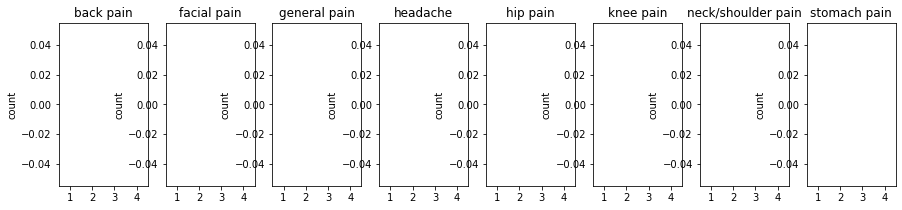

In [143]:
# check data count
f, axes = plt.subplots(1,len(pain_types), figsize=(15, 3))
c = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(dfab, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes[c])
    axes[c].set_title(k)
    axes[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [145]:
dfab['eid'] = dfab.index.values

<ipython-input-145-a5a510ea987f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfab['eid'] = dfab.index.values


In [149]:
[col for col in dfab.columns if str(1154) in col]

[]

1154
(649, 4)
1265
(649, 4)
1436
(649, 4)
1294
(649, 4)
1478
(649, 4)
1311
(649, 4)
1312
(649, 4)
1532
(649, 4)
1533
(649, 4)
1534
(649, 4)
1313
(649, 4)
1477
(649, 4)
1464
(649, 4)
1621
(649, 4)
1465
(649, 4)
1537
(649, 4)
1538
(649, 4)
1295
(649, 4)
1542
(649, 4)
1482
(649, 4)


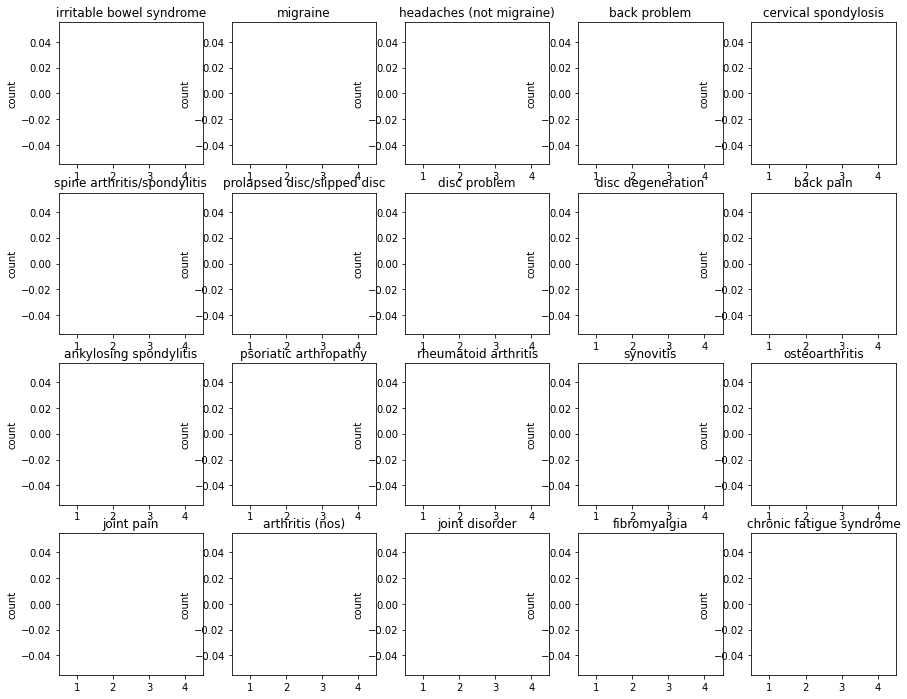

In [147]:
# check data count
f, axes = plt.subplots(4,int(df_disease.shape[0]/4), figsize=(15, 12))#, sharey=True)
c = 0

for i, r in df_disease.iterrows():
    print(r['code'])
    df_tmp = extract_disease(dfab, r['code'], visit=[0,1,2,3])
    print(df_tmp.shape)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [151]:
# people who has pain in digestive q but no pain
p_cols = []
for i, r in df_digestive.iterrows():
    p_cols += [col for col in dfq.columns if str(r['code']) in col]

In [155]:
df_digestive

,Field title,code
0,When digestive heakth questionnaire completed,21023
1,Abdominal discomfort/pain for 6 months or longer,21027
2,Currently (in last 3 months) suffer from abdom...,21035
3,Degree bothered by back pain in the past 3 months,21048
4,Degree bothered by chest pain in the last 3 mo...,21052
5,Degree bothered by headaches in the last 3 months,21051
6,Degree bothered by pain in arms/legs/joints in...,21049
7,Degree bothered by pain/problems during interc...,21057
8,Frequency of discomfort/pain in abdomen in las...,21025
9,Severity of current abdominal pain,21036


In [153]:
dfab[p_cols].head()

,21023-0.0,21027-0.0,21035-0.0,21048-0.0,21052-0.0,21051-0.0,21049-0.0,21057-0.0,21025-0.0,21036-0.0
eid,,,,,,,,,,
1002393,2017-05-04T20:10:11,1.0,0.0,-600.0,-600.0,-600.0,-600.0,-600.0,2.0,NaN
1002884,2017-04-21T18:38:44,1.0,1.0,-601.0,-600.0,-601.0,-601.0,-600.0,3.0,6.0
1003357,2017-04-10T09:30:30,1.0,1.0,-600.0,-600.0,-600.0,-601.0,-818.0,3.0,2.0
1024186,2017-05-01T10:01:51,1.0,1.0,-601.0,-600.0,-601.0,-601.0,-313.0,6.0,3.0
1029223,2017-04-23T22:13:16,1.0,0.0,-600.0,-600.0,-600.0,-601.0,-600.0,2.0,NaN


In [156]:
dfab.shape

(649, 3794)